In [1]:
from Controller_GCN import Trainer, Evaluator
import torch
import os
import joblib
import json

info_dict = dict()
info_dict['numb_sample'] = None # training sample for 1 epoch
info_dict['numb_epoch'] = 100 # number of epoch
info_dict['numb_gcn_layers'] = 1 # number of gin layers to be stacked
info_dict['gcn_hidden_dim'] = [] # hidden layer in each gin layer
info_dict['gcn_output_dim'] = 1024
info_dict['gcn_input_dim'] = 2048
info_dict['batchnorm'] = True
info_dict['batch_size'] = 128
info_dict['dropout'] = 0.5
info_dict['visual_backbone'] = 'b5' # 'b0' or 'b4'
info_dict['visual_ft_dim'] = 2048
#info_dict['save_dir'] = '/home/hong01/Research/GraSim/Report'
info_dict['save_dir'] = './Graphs/Report'
info_dict['optimizer'] = 'Adam' # or Adam
info_dict['learning_rate'] = 3e-4
info_dict['activate_fn'] = 'swish' # swish, relu, leakyrelu
info_dict['grad_clip'] = 2 # Gradient clipping
# info_dict['use_residual'] = False # always set it to false
# Embedder for each objects and predicates, embed graph only base on objects
info_dict['model_name'] = 'GCN_ObjAndPredShare_NoFtExModule_LSTM_i2t' 
info_dict['checkpoint'] = None #'/home/nmduy/Graphs/GraSim/Report/GCN_ObjAndPredShare_NoFtExModule_LSTM-15022021-014523.pth.tar'
info_dict['margin_matrix_loss'] = 0.35
info_dict['rnn_numb_layers'] = 2
info_dict['rnn_bidirectional'] = True
info_dict['rnn_structure'] = 'LSTM'
info_dict['graph_emb_dim'] = info_dict['gcn_output_dim']*2
info_dict['include_pred_ft'] = True # include visual predicate features or not
info_dict['freeze'] = False

In [2]:
info_dict['checkpoint'] = './Graphs/GCN_ObjAndPredShare_NoFtExModule_LSTM_Freeze-16022021-030527.pth.tar'

evaluator = Evaluator(info_dict)
evaluator.load_trained_model()

subset = 'test'
DATA_DIR = './Data'
DATA_IMG_DIR = './Data'
images_data = joblib.load(f"{DATA_IMG_DIR}/flickr30k_{subset}_lowered_images_data.joblib")
caps_data = joblib.load(f"{DATA_DIR}/flickr30k_{subset}_lowered_caps_data.joblib")

#     lossVal, ar_val, ari_val = evaluator.validate_retrieval(images_data, caps_data, False)
#     info_txt = f"\n----- SUMMARY (Matrix)-----\nLoss Val: {6-lossVal}"   
#     info_txt = info_txt + f"\n[i2t] {round(ar_val[0], 4)} {round(ar_val[1], 4)} {round(ar_val[2], 4)}"
#     info_txt = info_txt + f"\n[t2i] {round(ari_val[0], 4)} {round(ari_val[1], 4)} {round(ari_val[2], 4)}"
#     print(info_txt)

lossVal, ar_val, ari_val = evaluator.validate_retrieval(images_data, caps_data, True, 't2i')
info_txt = f"\n----- SUMMARY (Combine)-----\nLoss Val: {6-lossVal}"   
info_txt = info_txt + f"\n[i2t] {round(ar_val[0], 4)} {round(ar_val[1], 4)} {round(ar_val[2], 4)}"
info_txt = info_txt + f"\n[t2i] {round(ari_val[0], 4)} {round(ari_val[1], 4)} {round(ari_val[2], 4)}"
print(info_txt)

Initilised with given init_weight
Initilised with given init_weight
Initilised with given init_weight
LOAD PRETRAINED MODEL AT ./Graphs/GCN_ObjAndPredShare_NoFtExModule_LSTM_Freeze-16022021-030527.pth.tar
---------- VALIDATE RETRIEVAL ----------
Embedding objects and predicates of images ...
Embedding captions data ...
Scoring ...
Contrastive Score ...
GraphEmb Score ...
rsum: 4.9074
Average i2t Recall: 0.8633
Image to text: 0.7100 0.9190 0.9610 1.0000 2.9950
Average t2i Recall: 0.7725
Text to image: 0.5744 0.8414 0.9016 1.0000 6.6646

----- SUMMARY (Combine)-----
Loss Val: 1.0926
[i2t] 0.71 0.919 0.961
[t2i] 0.5744 0.8414 0.9016


In [3]:
lossVal, ar_val, ari_val, result = evaluator.validate_retrieval_result(images_data, caps_data, True, 't2i')
info_txt = f"\n----- SUMMARY (Combine)-----\nLoss Val: {6-lossVal}"   
info_txt = info_txt + f"\n[i2t] {round(ar_val[0], 4)} {round(ar_val[1], 4)} {round(ar_val[2], 4)}"
info_txt = info_txt + f"\n[t2i] {round(ari_val[0], 4)} {round(ari_val[1], 4)} {round(ari_val[2], 4)}"
print(info_txt)

---------- VALIDATE RETRIEVAL RESULT ----------
Embedding objects and predicates of images ...
Embedding captions data ...
Scoring ...
Contrastive Score ...
GraphEmb Score ...
rsum: 4.9074
Average i2t Recall: 0.8633
Image to text: 0.7100 0.9190 0.9610 1.0000 2.9950
Average t2i Recall: 0.7725
Text to image: 0.5744 0.8414 0.9016 1.0000 6.6646

----- SUMMARY (Combine)-----
Loss Val: 1.0926
[i2t] 0.71 0.919 0.961
[t2i] 0.5744 0.8414 0.9016


In [4]:
result['i2t'][0:5] # ranks is the ranks of the ground truth in the prediction --> if pred is good, all of them should in in 0 - 4

[{'id': 0,
  'top5': [2, 4, 1644, 1642, 0],
  'top1': 2,
  'top10': [2, 4, 1644, 1642, 0, 1, 3848, 3911, 3, 1641],
  'ranks': [(0, 4), (1, 5), (2, 0), (3, 8), (4, 1)],
  'is_top1': 1,
  'is_top5': 1},
 {'id': 1,
  'top5': [5, 6, 8, 944, 1409],
  'top1': 5,
  'top10': [5, 6, 8, 944, 1409, 3812, 7, 1408, 1170, 1350],
  'ranks': [(5, 0), (6, 1), (7, 6), (8, 2), (9, 23)],
  'is_top1': 1,
  'is_top5': 1},
 {'id': 2,
  'top5': [2660, 4529, 13, 2233, 2662],
  'top1': 2660,
  'top10': [2660, 4529, 13, 2233, 2662, 1471, 477, 2929, 4633, 14],
  'ranks': [(10, 26), (11, 18), (12, 33), (13, 2), (14, 9)],
  'is_top1': 0,
  'is_top5': 1},
 {'id': 3,
  'top5': [17, 16, 18, 524, 15],
  'top1': 17,
  'top10': [17, 16, 18, 524, 15, 31, 30, 522, 520, 3392],
  'ranks': [(15, 4), (16, 1), (17, 0), (18, 2), (19, 11)],
  'is_top1': 1,
  'is_top5': 1},
 {'id': 4,
  'top5': [22, 23, 20, 24, 21],
  'top1': 22,
  'top10': [22, 23, 20, 24, 21, 1309, 44, 1097, 220, 4374],
  'ranks': [(20, 2), (21, 4), (22, 0), (23

In [5]:
result['t2i'][120:125]

[{'id': 120,
  'top5': [24, 707, 602, 798, 192],
  'top10': [24, 707, 602, 798, 192, 336, 242, 834, 768, 710],
  'top1': 24,
  'is_top1': 1,
  'is_top5': 1,
  'ranks': [(24, 0.0)]},
 {'id': 121,
  'top5': [24, 653, 831, 921, 261],
  'top10': [24, 653, 831, 921, 261, 602, 192, 798, 582, 841],
  'top1': 24,
  'is_top1': 1,
  'is_top5': 1,
  'ranks': [(24, 0.0)]},
 {'id': 122,
  'top5': [24, 707, 831, 159, 923],
  'top10': [24, 707, 831, 159, 923, 226, 809, 528, 599, 964],
  'top1': 24,
  'is_top1': 1,
  'is_top5': 1,
  'ranks': [(24, 0.0)]},
 {'id': 123,
  'top5': [24, 707, 670, 395, 269],
  'top10': [24, 707, 670, 395, 269, 599, 261, 602, 21, 69],
  'top1': 24,
  'is_top1': 1,
  'is_top5': 1,
  'ranks': [(24, 0.0)]},
 {'id': 124,
  'top5': [24, 602, 831, 707, 164],
  'top10': [24, 602, 831, 707, 164, 192, 921, 261, 187, 841],
  'top1': 24,
  'is_top1': 1,
  'is_top5': 1,
  'ranks': [(24, 0.0)]}]

In [6]:
image_caption_matching = joblib.load('./Data/image_caption_matching_flickr_test.joblib')
caption_image_matching = joblib.load('./Data/caption_image_matching_flickr_test.joblib')
list_id_image = list(image_caption_matching.keys())
list_id_caption = list(caption_image_matching.keys())
caption_json = './Data/flickr30k_test_caps_with_rel.json'
with open(caption_json) as f:
    caption_json = json.load(f)
caption_sentid = {}
for idx in range(len(caption_json)):
    c = caption_json[idx]['captions']
    for idx_c in range(len(c)):
        sid = str(c[idx_c]['sentid'])
        t = c[idx_c]['sent']
        caption_sentid[sid] = t

In [7]:
image_caption_matching['1007129816.jpg']

['125', '126', '127', '128', '129']

In [8]:
caption_image_matching['125']

'1007129816.jpg'

In [9]:
list_id_image[3], list_id_image[4]

('102617084.jpg', '10287332.jpg')

# PLOT IMAGE

In [10]:
from PIL import Image
import json
import joblib

image_dir = './DataSets/flickr30k-images'

In [11]:
idx_img = 3
image_path = f"{image_dir}/{list_id_image[idx_img]}"
image = Image.open(image_path)

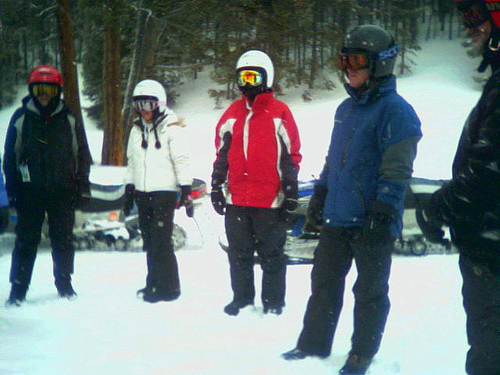

In [12]:
image

In [13]:
result_i2t = result['i2t'][idx_img]
top_retrieval = result_i2t['top5']
captions_id = [list_id_caption[x] for x in top_retrieval]
result_i2t

{'id': 3,
 'top5': [17, 16, 18, 524, 15],
 'top1': 17,
 'top10': [17, 16, 18, 524, 15, 31, 30, 522, 520, 3392],
 'ranks': [(15, 4), (16, 1), (17, 0), (18, 2), (19, 11)],
 'is_top1': 1,
 'is_top5': 1}

In [14]:
captions_id

['447', '446', '448', '14534', '445']

In [15]:
[caption_sentid[x] for x in captions_id]

['Five people wearing winter clothing, helmets, and ski goggles stand outside in the snow.',
 'Five people wearing winter jackets and helmets stand in the snow, with snowmobiles in the background.',
 'A group of snowmobile riders gather in the snow.',
 'A group of people are climbing in cold weather.',
 'Five snowmobile riders all wearing helmets and goggles line up in a snowy clearing in a forest in front of their snowmobiles; they are all wearing black snow pants and from left to right they are wearing a black coat, white coat, red coat, blue coat, and black coat.']

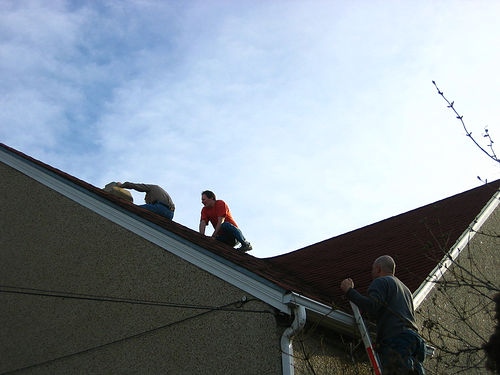

In [16]:
idx_img = 4
image_path = f"{image_dir}/{list_id_image[idx_img]}"
image = Image.open(image_path)
image

In [17]:
result_i2t = result['i2t'][idx_img]
top_retrieval = result_i2t['top5']
captions_id = [list_id_caption[x] for x in top_retrieval]
result_i2t

{'id': 4,
 'top5': [22, 23, 20, 24, 21],
 'top1': 22,
 'top10': [22, 23, 20, 24, 21, 1309, 44, 1097, 220, 4374],
 'ranks': [(20, 2), (21, 4), (22, 0), (23, 1), (24, 3)],
 'is_top1': 1,
 'is_top5': 1}

In [18]:
[caption_sentid[x] for x in captions_id]

['Three men, one on a ladder, work on a roof.',
 'People are fixing the roof of a house.',
 'Two men sitting on the roof of a house while another one stands on a ladder.',
 'Three men are working on a roof.',
 'Two men on a rooftop while another man stands atop a ladder watching them']

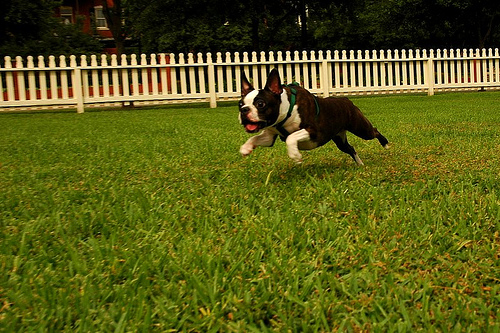

In [19]:
idx_img = 1
image_path = f"{image_dir}/{list_id_image[idx_img]}"
image = Image.open(image_path)
image

In [20]:
result_i2t = result['i2t'][idx_img]
top_retrieval = result_i2t['top5']
captions_id = [list_id_caption[x] for x in top_retrieval]
[caption_sentid[x] for x in captions_id]

['A black and white dog is running in a grassy garden surrounded by a white fence.',
 'A Boston Terrier is running on lush green grass in front of a white fence.',
 'A dog runs on the green grass near a wooden fence.',
 'A dog running though a grassy field.',
 'Two dogs jump for a ball on a green field.']

# Text to Img

In [21]:
idx = 722 #1020
id_captions = list_id_caption[idx]
print(f'ID CAP: {id_captions}')
result_t2i = result['t2i'][idx]
id_imgs = result_t2i['top5']
result_t2i

ID CAP: 22507


{'id': 722,
 'top5': [144, 76, 25, 15, 899],
 'top10': [144, 76, 25, 15, 899, 273, 217, 775, 688, 134],
 'top1': 144,
 'is_top1': 1,
 'is_top5': 1,
 'ranks': [(144, 0.0)]}

In [22]:
caption = caption_sentid[id_captions]
caption

'Little Girl in brown shirt and blue jean skirt dances on wood floor.'

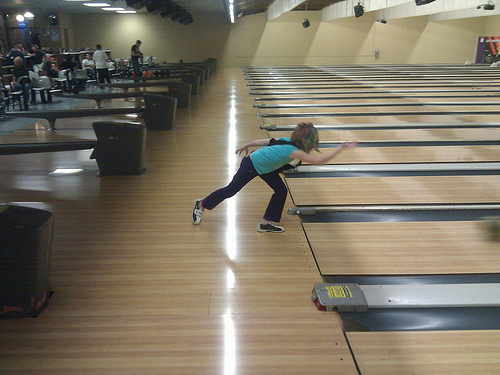

In [23]:
image_path = f"{image_dir}/{list_id_image[id_imgs[4]]}"
image = Image.open(image_path)
image